<a href="https://colab.research.google.com/github/SethupathyM/EDA---Capstone-Project/blob/main/Hotel_Booking_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
# importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)



In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
# Data frame reading
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Modules/Python/Projects/EDA Hotel Booking/Copy of Hotel Bookings.csv')
df1=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Modules/Python/Projects/EDA Hotel Booking/Copy of Hotel Bookings.csv')

In [131]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [132]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [133]:
df.shape

(119390, 32)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [135]:
df.describe(include= 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [136]:
columns = list(df.columns)
columns

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [137]:
# Numerical variables
numeric_var = df.describe().columns.tolist()
print(len(numeric_var))
print(numeric_var)

20
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [138]:
# Categorical variables
categorical_var = [var for var in df.columns if var not in df.describe().columns]
print(len(categorical_var))
print(categorical_var)

12
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [139]:
# Counting the total null values in each columns
count = df1.isnull().sum()
#Percentage of total null values in each columns
percentage = round(count/df1.isnull().count(),4) *100
#concating the count and percentage
df_temp = pd.concat([count,percentage], axis = 1, keys = ['Null_count', 'Null_percent']).reset_index()
df_temp

,index,Null_count,Null_percent
0,hotel,0,0.00
1,is_canceled,0,0.00
2,lead_time,0,0.00
3,arrival_date_year,0,0.00
4,arrival_date_month,0,0.00
5,arrival_date_week_number,0,0.00
6,arrival_date_day_of_month,0,0.00
7,stays_in_weekend_nights,0,0.00
8,stays_in_week_nights,0,0.00
9,adults,0,0.00


In [140]:
# DATA CLEANING -removing null values & changing children column to int type
df['children'] = df['children'].replace(np.nan, 0)
df['country'] = df['country'].replace(np.nan, 'no country')
df['agent'] = df['agent'].replace(np.nan, 0)
df.drop('company',axis=1,inplace=True)

df["children"]=df["children"].astype(int)

In [141]:
#Function to convert month_name to month_number

def num_month(month_name):
  m=['January','February','March','April','May','June','July','August','September','October','November','December']
  n=['01','02','03','04','05','06','07','08','09','10','11','12']
  return(n[m.index(month_name)])

#Function to convert single_digit_date to double_digit_date

def date_two_digit(single_digit_date):
  if single_digit_date<10:
    c=[1,2,3,4,5,6,7,8,9]
    d=['01','02','03','04','05','06','07','08','09']
    return(d[c.index(single_digit_date)])
  else:
    return(single_digit_date)

In [142]:
#Applying num_month function to df
df['month_num'] = df['arrival_date_month'].apply(num_month)
#Applying date_two_digit function to df
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].apply(date_two_digit)
#Assigning month_num to arrival_date_month
df['arrival_date_month'] = df['month_num']
#droping month_num
df.drop(['month_num'], axis = 1, inplace = True)

In [143]:
#Concating columns to get date in str format
df['date_'] = df['arrival_date_year'].astype(str)+ '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str) 

#Converting the date from str to DATE format 
df['date'] = pd.to_datetime(df.date_)

#droping temporary column
df.drop(['date_'], axis = 1,inplace=True)

In [144]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,0,342,2015,07,27,01,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,07,27,01,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,07,27,01,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,07,27,01,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,07,27,01,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [145]:
df.shape

(119390, 32)

In [146]:
# Counting the number of categories in categorial varibales
# Categorical variables
categorical_var = [var for var in df.columns if var not in df.describe().columns]
categorical_var_value = [var for var in categorical_var if var not in ('reservation_status_date')]
for var in categorical_var_value:
  print(df[var].value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
08    13877
07    12661
05    11791
10    11160
04    11089
06    10939
09    10508
03     9794
02     8068
11     6794
12     6780
01     5929
Name: arrival_date_month, dtype: int64
17    4406
05    4317
15    4196
25    4160
26    4147
09    4096
12    4087
16    4078
02    4055
19    4052
20    4032
18    4002
24    3993
28    3946
08    3921
03    3855
30    3853
06    3833
14    3819
27    3802
21    3767
04    3763
13    3745
07    3665
01    3626
23    3616
11    3599
22    3596
29    3580
10    3575
31    2208
Name: arrival_date_day_of_month, dtype: int64
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64
Online TA        56477
Offline TA/TO    24219
Groups    

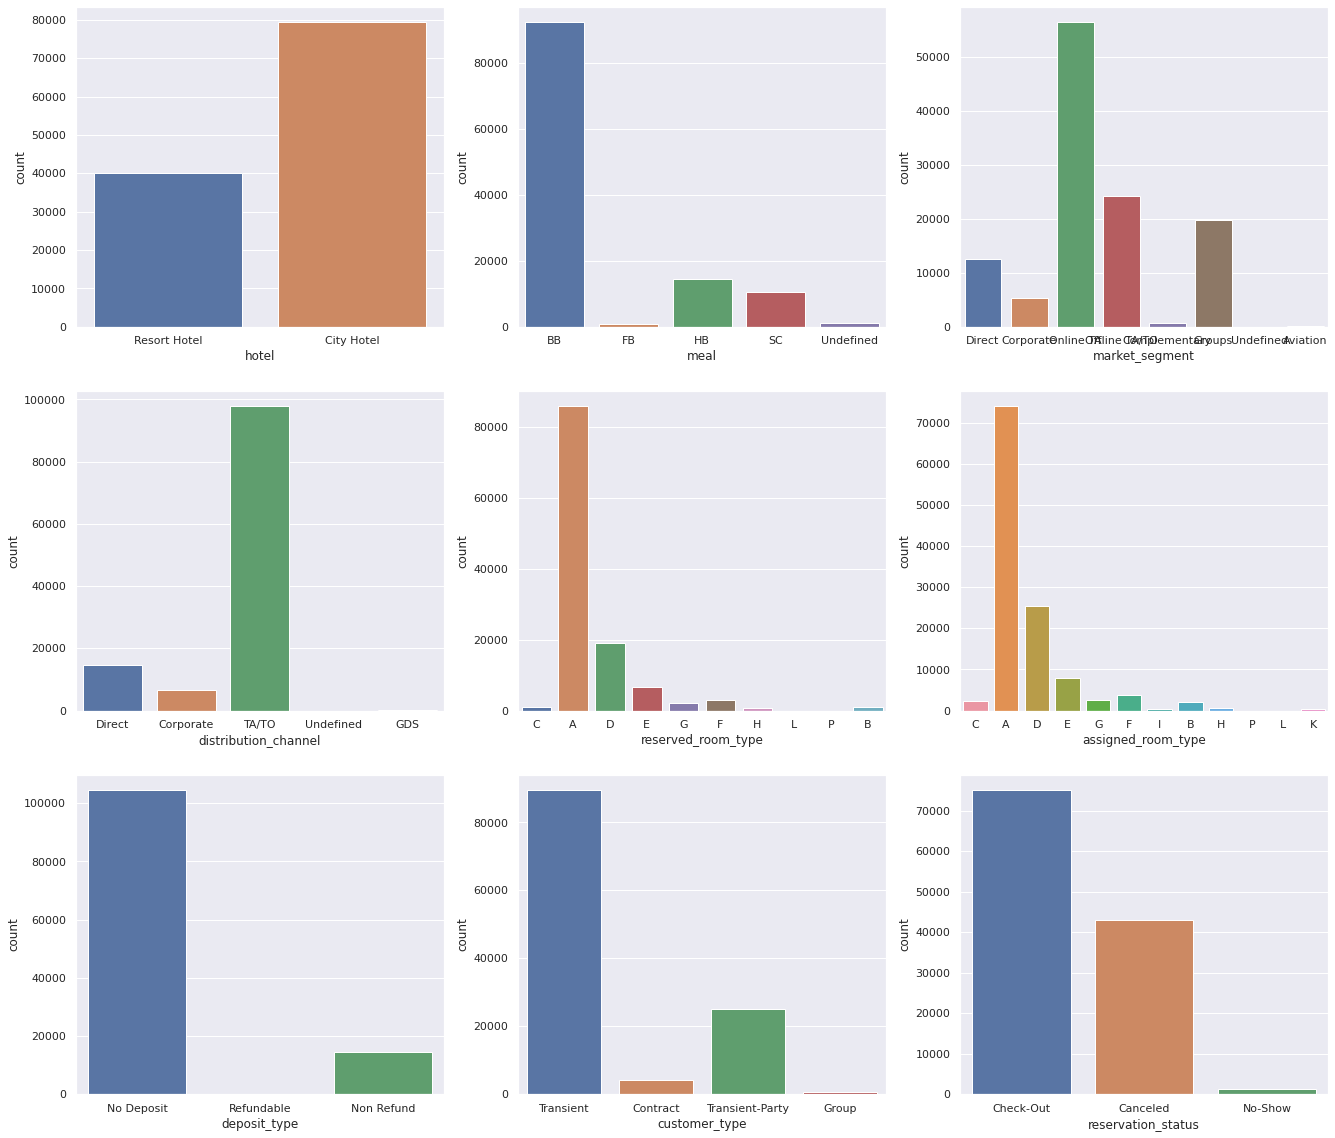

In [147]:
# Count plot for Categorical variables
lst_count = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
plt.figure(figsize = (20,20))
sns.set_theme()
for i in enumerate(lst_count):
    plt.subplot(3, 3,i[0]+1)
    sns.countplot(data = df, x = df[i[1]])

In [148]:
df.describe().columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

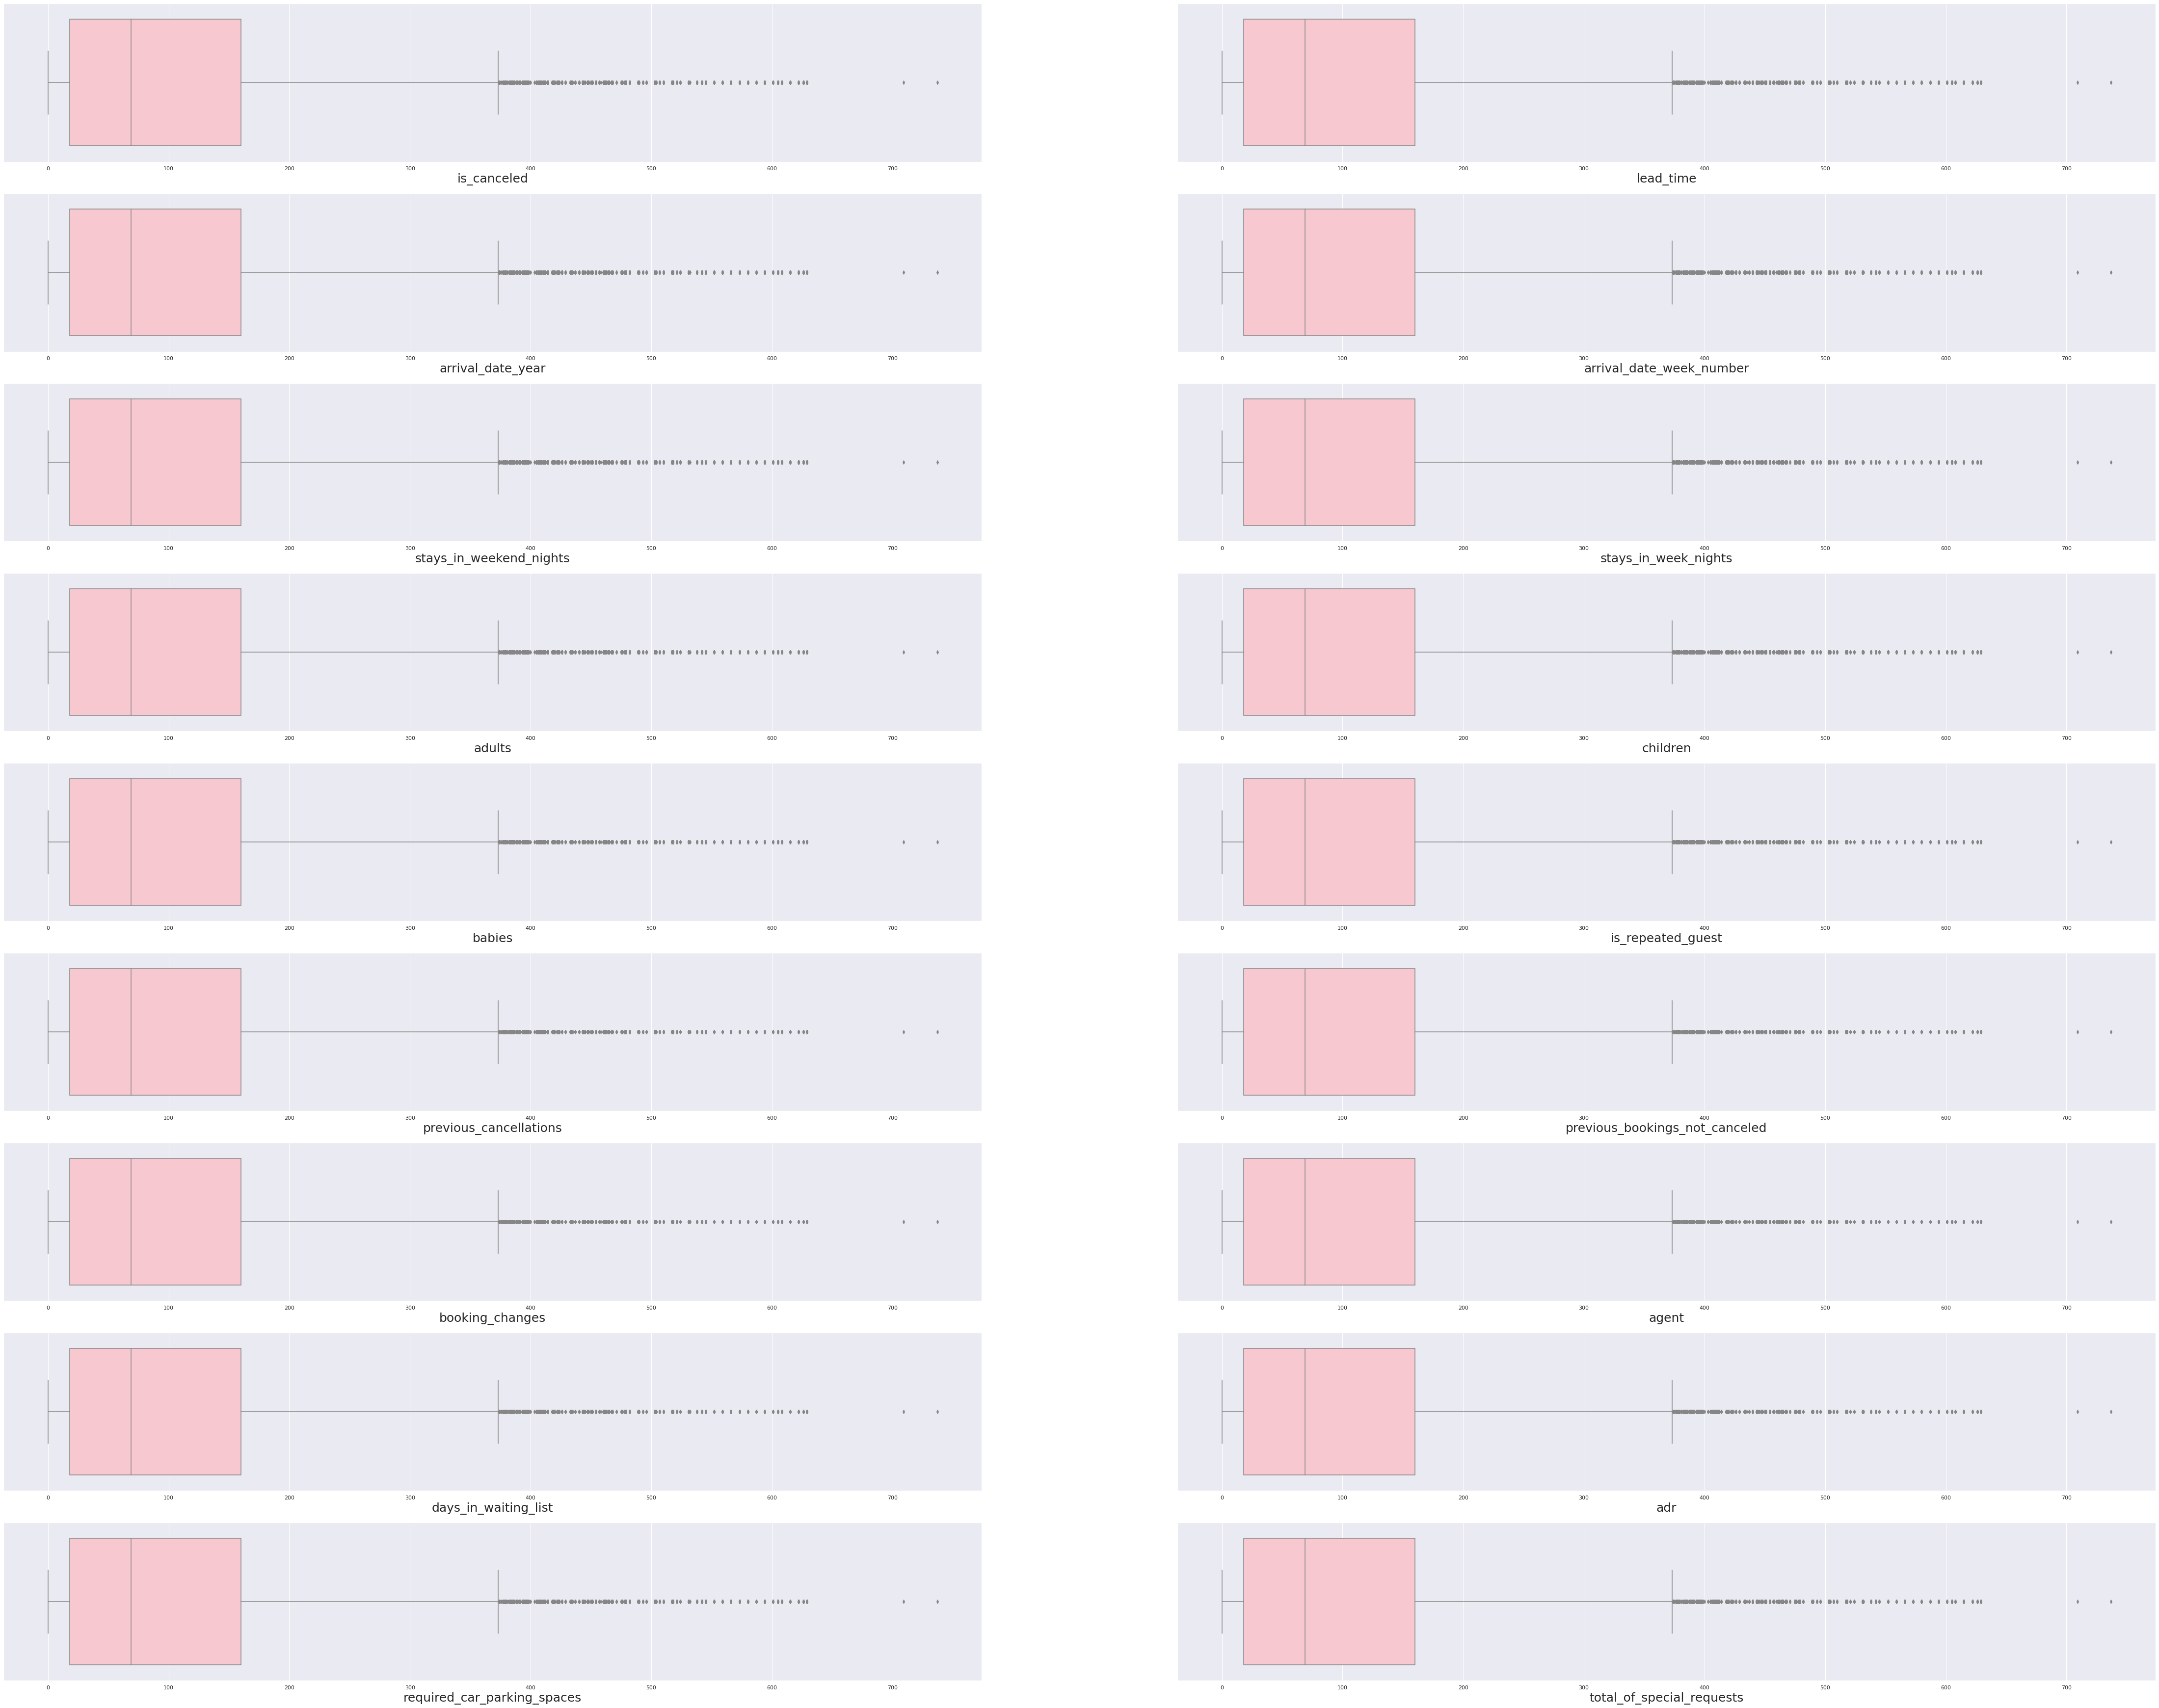

In [149]:
# Box plot to detect the outliers
lst_box = list(df.describe().columns)
plt.figure(figsize = (70,70))
sns.set_theme()
for i in enumerate(lst_box):
    plt.subplot(10, 2,i[0]+1)
    sns.boxplot(df["lead_time"],color='pink')
    plt.xlabel(i[1],fontsize=25)


In [150]:
# Outliers
# Outliers treatment by replacing the outliers with median
lst = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','agent','adr','total_of_special_requests']
for i in lst:
  quantile1,quantile3 = np.percentile(df[i],[25,75])
  # print('Quantile1:',quantile1)
  # print('Quantile3:',quantile3)
  iqr = quantile3 - quantile1
  # print('IQR:',iqr)
  lower_bound_val = quantile1 - (1.5 * iqr)
  upper_bound_val = quantile3 + (1.5 * iqr)
  # print(i+'_Lower Bound:',lower_bound_val)
  print(i+'_Upper Bound:',upper_bound_val)
  df[i] = df[i].apply(lambda x: df[i].median() if x > upper_bound_val else x)

lead_time_Upper Bound: 373.0
stays_in_weekend_nights_Upper Bound: 5.0
stays_in_week_nights_Upper Bound: 6.0
adults_Upper Bound: 2.0
agent_Upper Bound: 369.5
adr_Upper Bound: 211.065
total_of_special_requests_Upper Bound: 2.5


In [151]:
# Box plot between Reserved room types and adr 
df_not_cancelled = df[df['is_canceled'] == 0]
px.box(data_frame = df_not_cancelled, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')
# Average price per room based on the type


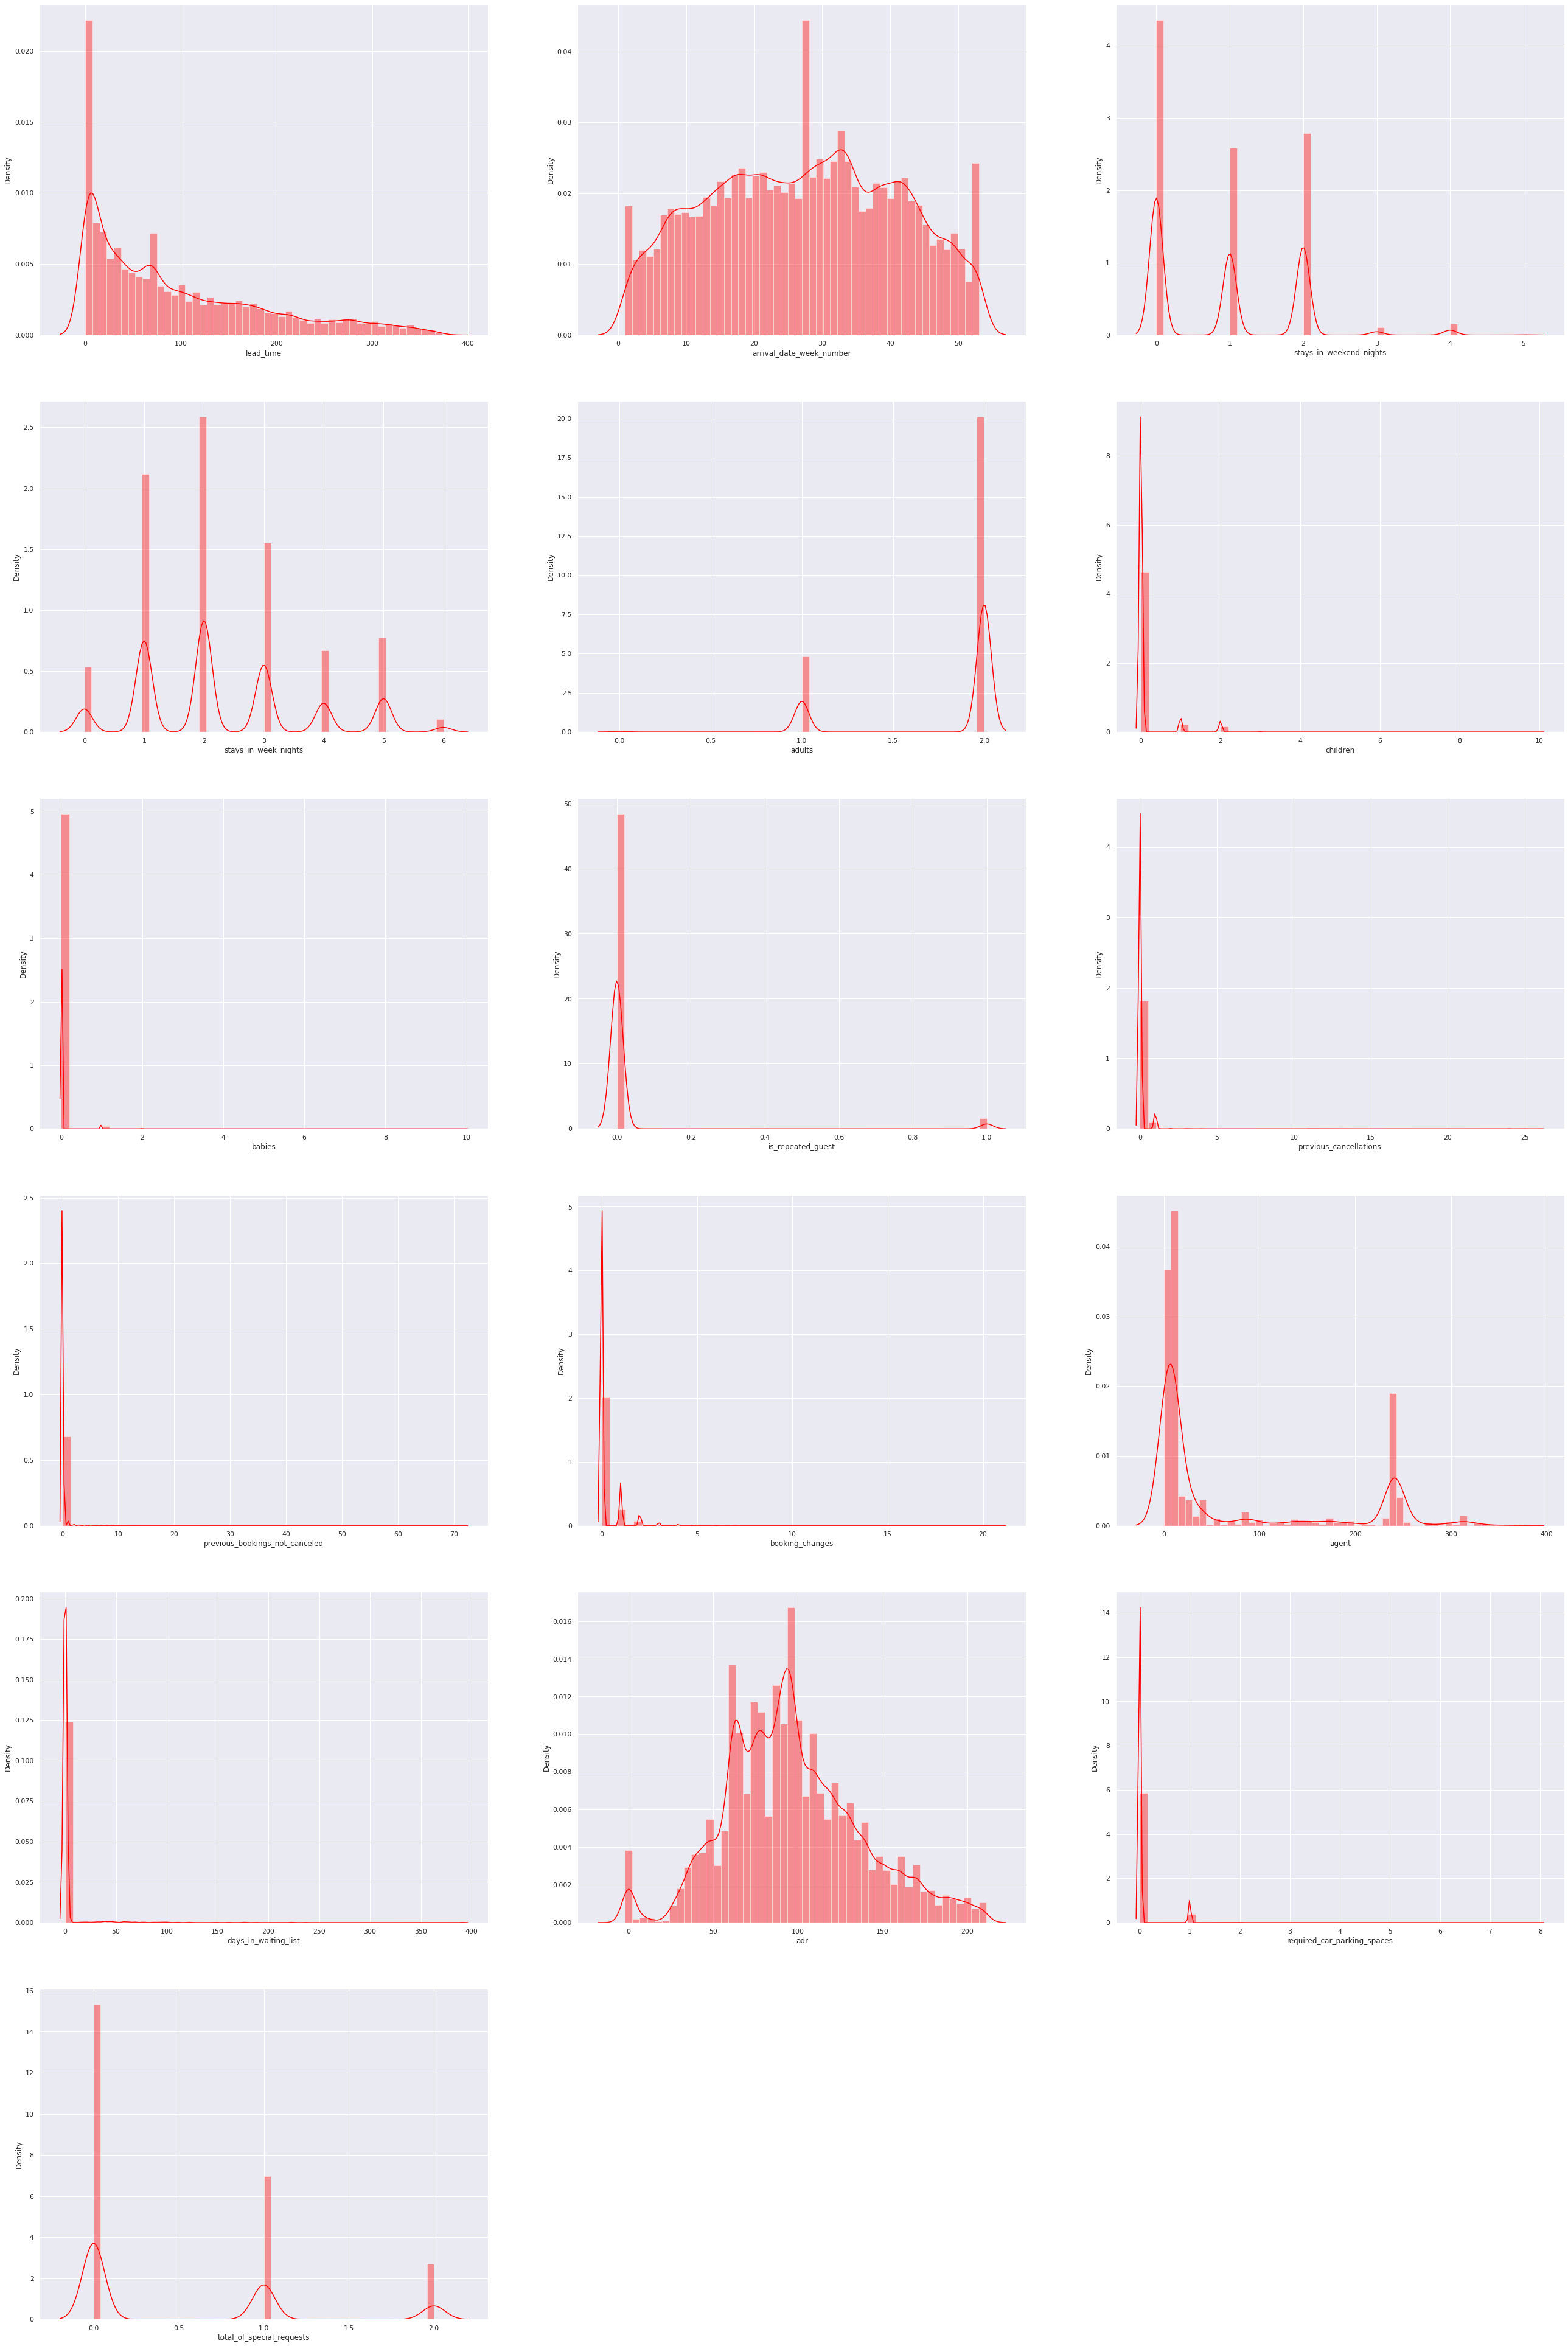

In [152]:
# Distribution of numerical variables
lst_dist = ['lead_time',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests']
plt.figure(figsize = (40,70))
sns.set_theme()
for i in enumerate(lst_dist):
    plt.subplot(6, 3,i[0]+1)
    sns.distplot(df[i[1]],color = 'Red')


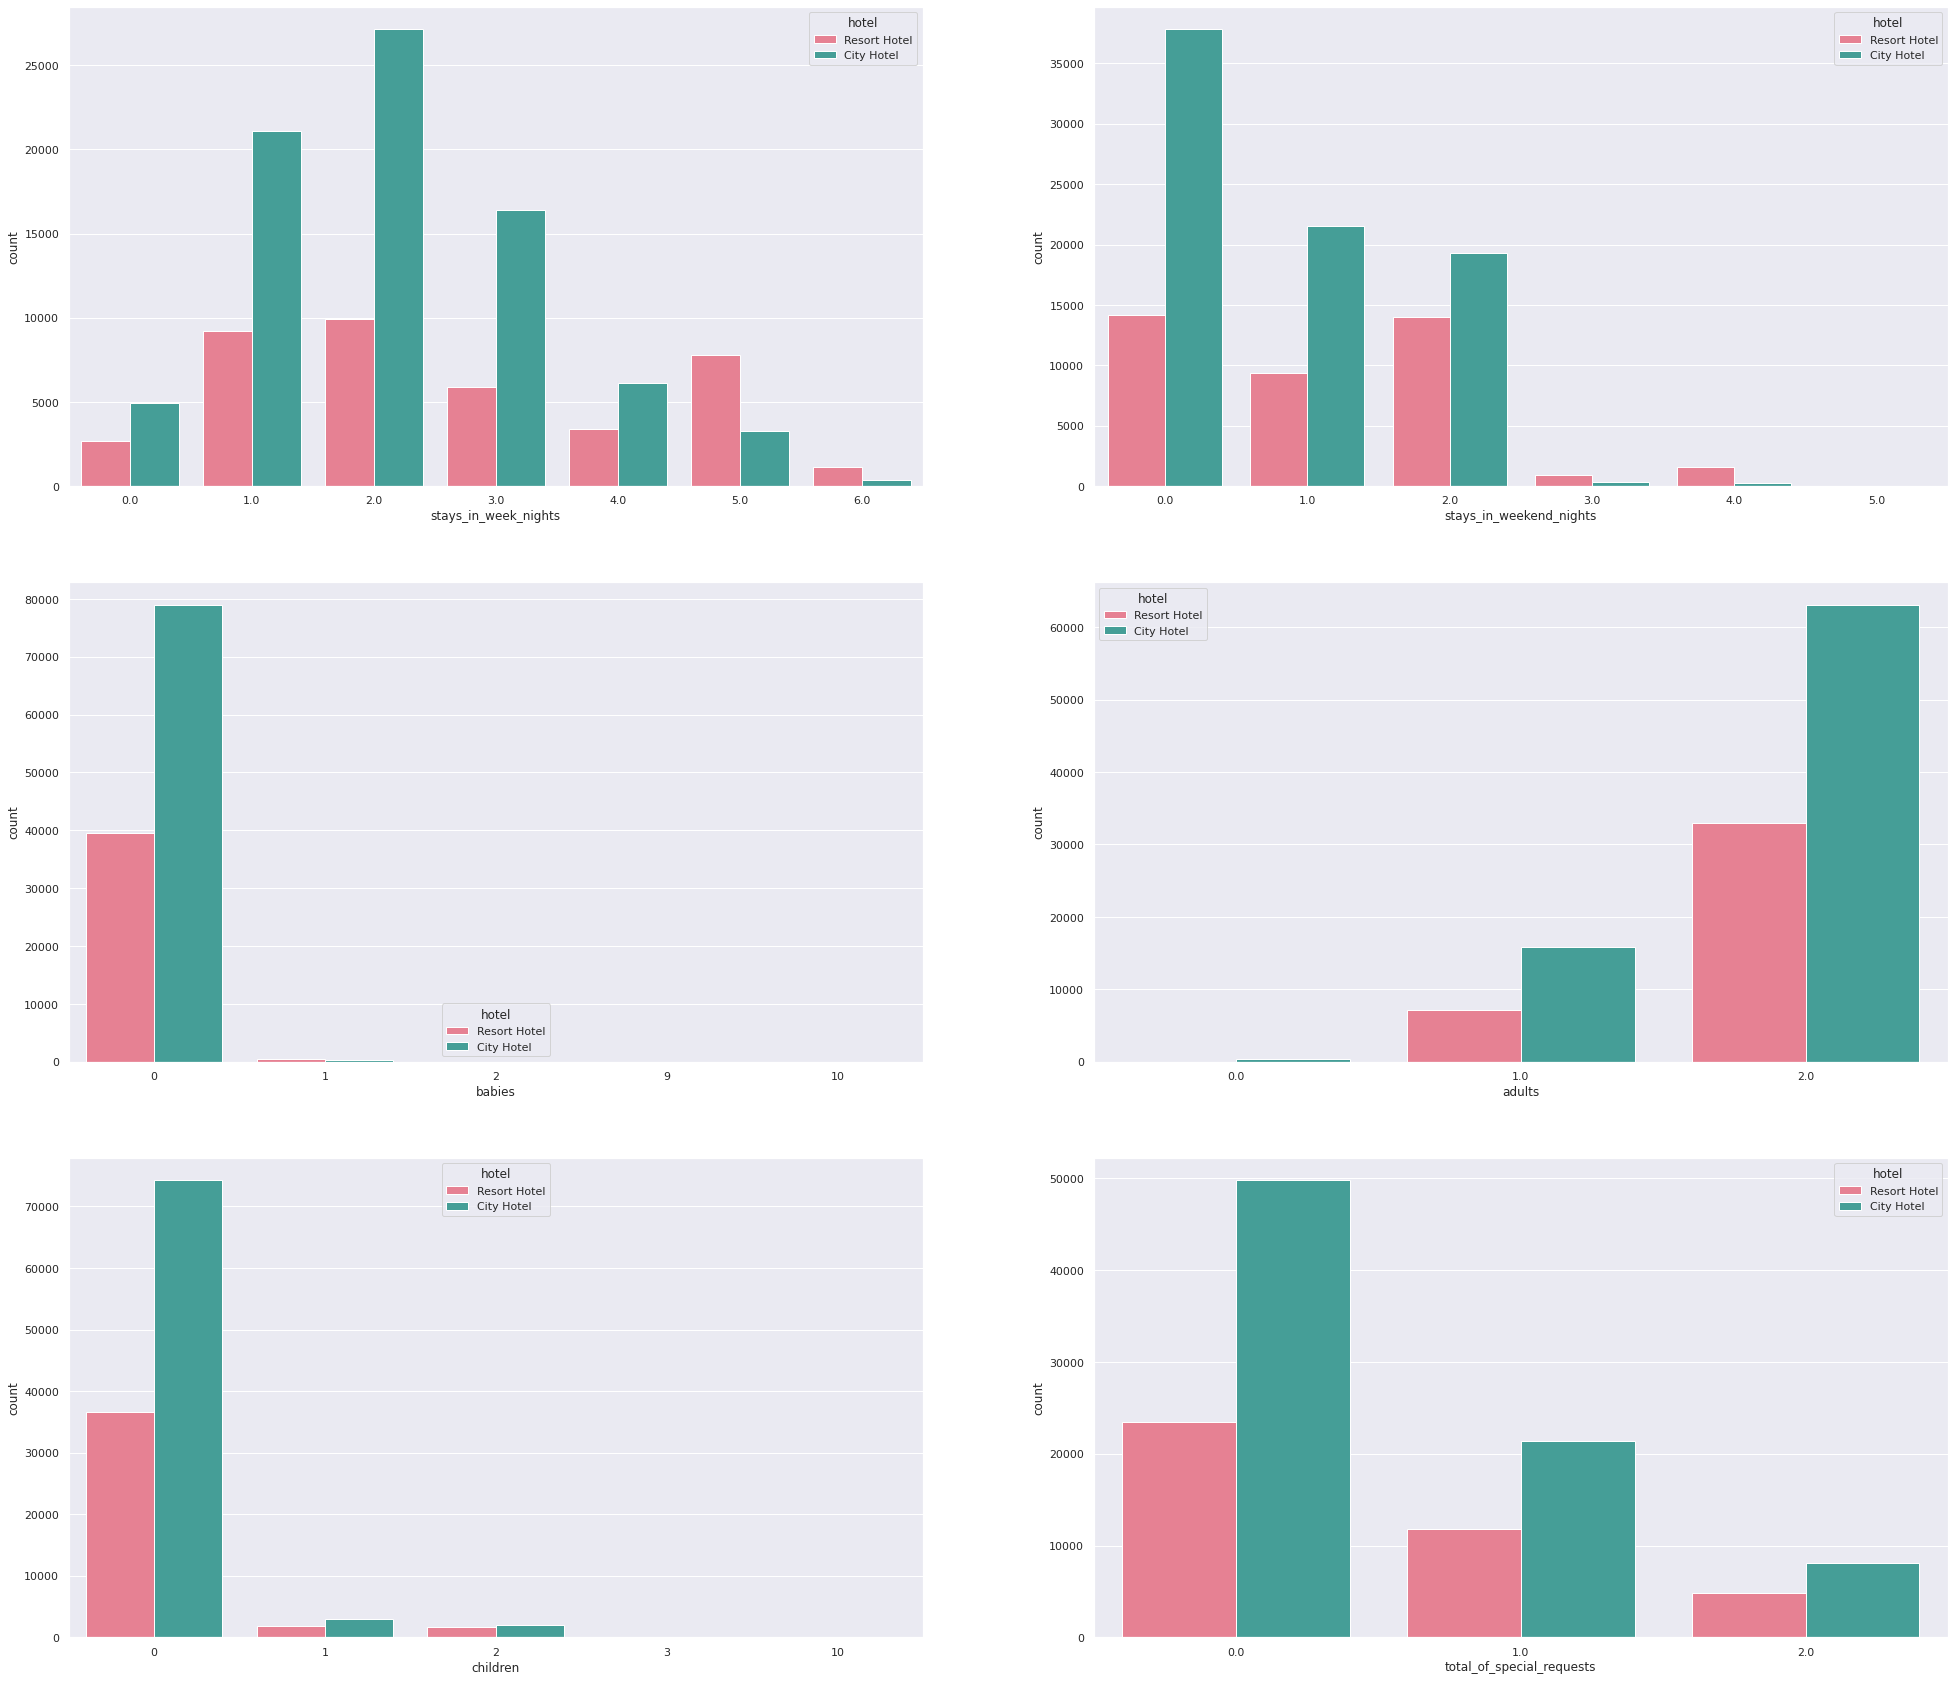

In [153]:
# From the above distribution plot some of the numerical variables have less unique values
# lets plot the count plot for those numerical variables
lst_count_num = ['stays_in_week_nights','stays_in_weekend_nights','babies','adults','children','total_of_special_requests']
plt.figure(figsize = (30,30))
sns.set_theme()
for i in enumerate(lst_count_num):
    plt.subplot(3, 2,i[0]+1)
    sns.countplot(data = df,x = df[i[1]], hue = 'hotel',palette='husl')

In [154]:
df.describe().columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

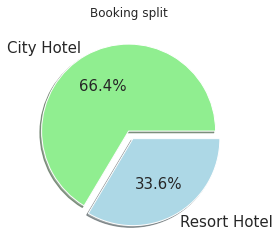

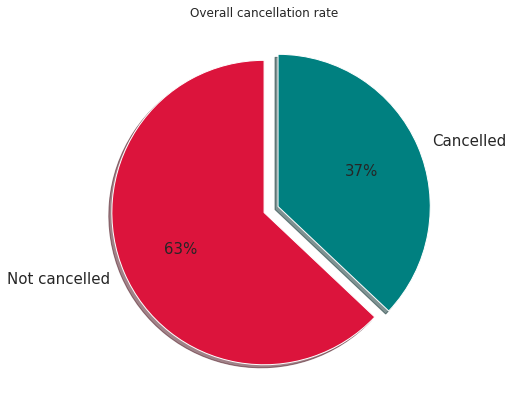

In [155]:
# Pie Chart representing Bookings 

values= df['hotel'].value_counts().tolist()
labe = df['hotel'].value_counts().index.tolist()

plt.pie(values ,labels=labe , radius=1,explode = [0,0.1],colors=['lightgreen','lightblue'] ,textprops={'fontsize': 15}, autopct='%0.1f%%',shadow=True)
plt.rcParams['figure.figsize']=(9,7)
plt.title('Booking split')
plt.show()

# Pie Chart representing Cancellation
y=df['is_canceled'].value_counts().tolist()
z=['Not cancelled','Cancelled']
plt.pie(y ,labels=z ,explode = [0,0.1],colors=['crimson','teal'],radius=1,startangle=90,textprops={'fontsize': 15}, autopct='%0.0f%%',shadow=True)
plt.title('Overall cancellation rate')
plt.rcParams['figure.figsize']=(10,7)
plt.show()

In [156]:
# Function to convert month number to month name in temporary table Adr_sum
def month_name(num_month):
  m=['January','February','March','April','May','June','July','August','September','October','November','December']
  n=['01','02','03','04','05','06','07','08','09','10','11','12']
  return(m[n.index(num_month)])

In [157]:
# Applying function groupby and month_name
adr_sum = df.groupby(['arrival_date_month']).sum('adr').reset_index()
adr_sum['month_name'] = adr_sum['arrival_date_month'].apply(month_name)

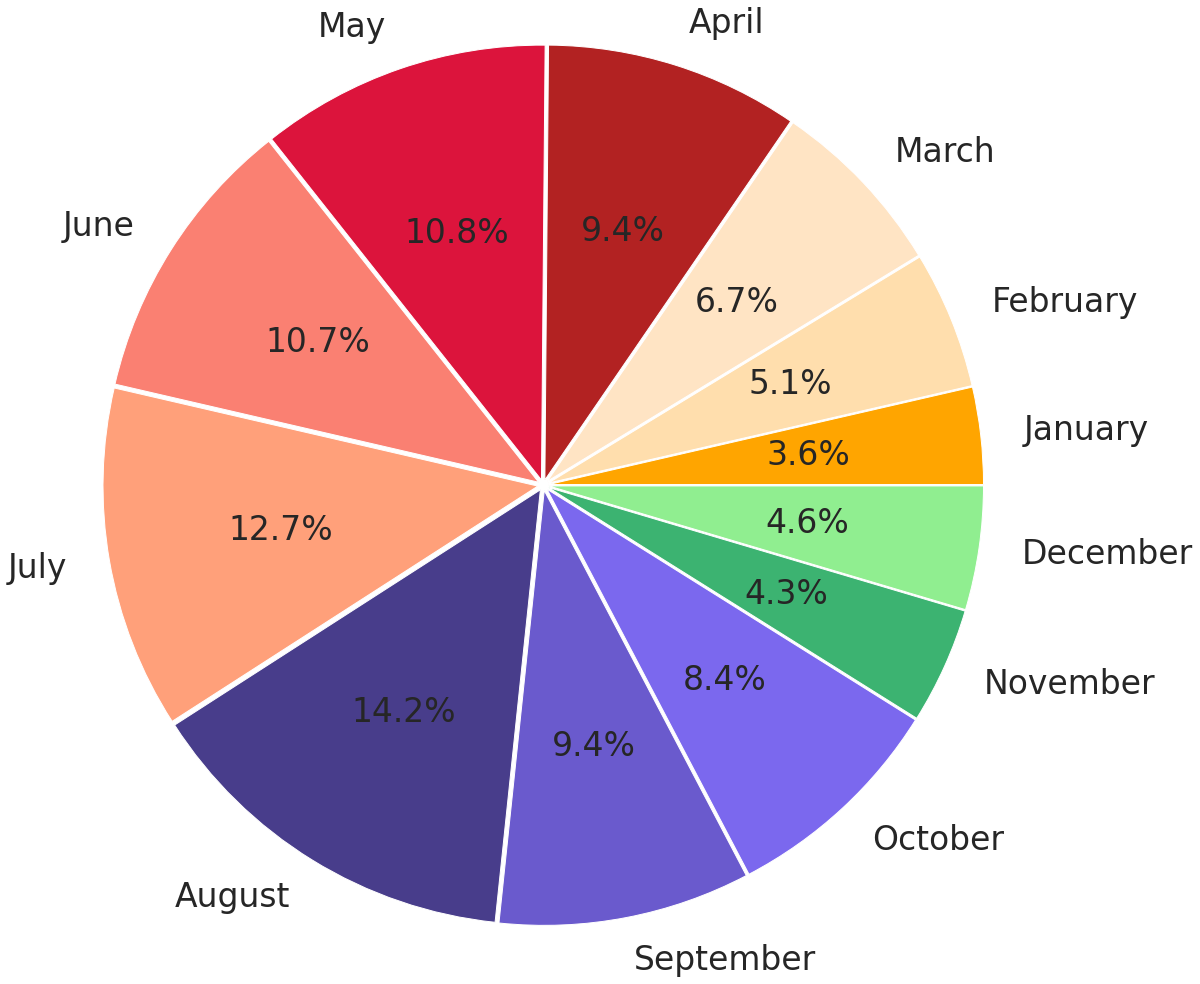

In [158]:
# importing colors
import matplotlib.colors as mcolors
# Plotting the pie chart
plt.figure(figsize = (10,10))
plt.pie(adr_sum['adr'], labels = adr_sum['month_name'], explode = [0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025], colors = ['orange','navajowhite','bisque','firebrick','crimson','salmon','lightsalmon','darkslateblue','slateblue','mediumslateblue','mediumseagreen','lightgreen'], radius = 2, textprops = {'fontsize': 33}, autopct = '%0.1f%%' )
# plt.title('Revenue per month', fontsize = 20)
plt.show()

In [159]:
# y=df['is_canceled'].value_counts().tolist()
# z=['Not cancelled','Cancelled']
# plt.ylabel('Bookings count')
# plt.xlabel('Booking status')
# plt.title('Overall cancellation rate')
# plt.bar(z,y,width=0.5,color=['blue','orange'])
# plt.rcParams['figure.figsize']=(9,7)
# plt.show()

In [160]:
#Extracting required columns

df_new= df[['hotel','is_canceled']]
dx=df_new.value_counts().tolist()
dy=['City Hotel','Resort Hotel']

#dx=[46228, 33102, 28938, 11122]

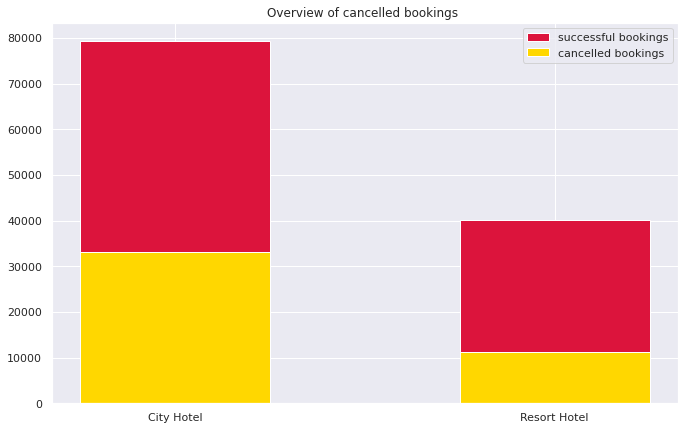

In [161]:
# Plotting Overview of cancelled bookings with repect to hotel types # Bar graph

width_of_hotel_types =0.5
yy=df['hotel'].value_counts().tolist()
plt.bar(dy,yy,width_of_hotel_types,color = 'crimson',label='successful bookings')
plt.bar(dy,dx[1::2],width_of_hotel_types,color = 'gold',label='cancelled bookings')
plt.title('Overview of cancelled bookings ')
plt.legend()
plt.rcParams['figure.figsize']=(9,7)
plt.show()

City Hotel: 102.86459195764527
Resort Hotel: 85.26259897653519


Text(0.5, 1.0, 'Revenue per Booking')

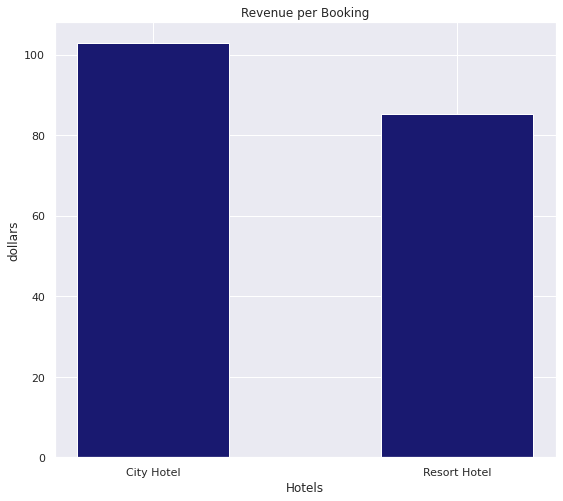

In [162]:
# Earnings of the hotels per booking

City_hotel_booking, Resort_hotel_booking = df['hotel'].value_counts()
# print('City hotel booking count:',City_hotel_booking)
# print('Resort hotel booking count:',Resort_hotel_booking)
City_hotel_adr = df.groupby('hotel').agg({'adr':'sum'}).reset_index().iloc[0,1]
Resort_hotel_adr = df.groupby('hotel').agg({'adr':'sum'}).reset_index().iloc[1,1]
# print('City hotel total adr:',City_hotel_adr)
# print('Resort hotel total adr:',Resort_hotel_adr)
City_hotel_adr_perbooking = City_hotel_adr/City_hotel_booking
Resort_hotel_adr_perbooking = Resort_hotel_adr/Resort_hotel_booking
print('City Hotel:',City_hotel_adr_perbooking)
print('Resort Hotel:',Resort_hotel_adr_perbooking)
adr_x = ['City Hotel','Resort Hotel']
adr_y = [City_hotel_adr_perbooking,Resort_hotel_adr_perbooking]
plt.figure(figsize = (8,8))
plt.bar(adr_x,adr_y,color = 'midnightblue',width = 0.5)
plt.xlabel('Hotels')
plt.ylabel('dollars')
plt.title('Revenue per Booking')
# From this we can see that City hotel is earning more than Resort hotel per booking

In [163]:
# Booking from countries
booking_by_country  = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
booking_by_country.columns = ['Country', 'No of booking']
booking_by_country

,Country,No of booking
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [164]:
def interchange(z):
  if z==0:
    return 1
  else:
    return 0

bb=df.loc[:,['is_canceled','country']]
bb['is_canceled']=bb['is_canceled'].apply(interchange)
cx_country= bb[bb['is_canceled'] == 1].groupby(['country']).sum().reset_index()
cx_country.rename({'is_canceled':'cx_count'},axis=1,inplace=True)

In [165]:
# Importing  Plotly.express to plot a choropleth map
import plotly.express as px

fig=px.choropleth(cx_country, locations = 'country',color= "cx_count", hover_name= "country", scope='world',title="Home country of visitors")
fig.show()

In [166]:
# Europe market without portugal
cc=df.loc[:,['is_canceled','country']]
cc['is_canceled']=cc['is_canceled'].apply(interchange)
dd=cc.groupby(df['country']).sum().sort_values(by='is_canceled',ascending=False).reset_index().query('is_canceled < 10000')
dd.rename({'is_canceled':'cx_count'},axis=1,inplace=True)


In [167]:
# Europe market 
fig=px.choropleth(dd, locations = 'country',color= 'cx_count', hover_name= 'country',scope='europe',title='Home country of visitors')
fig.show()

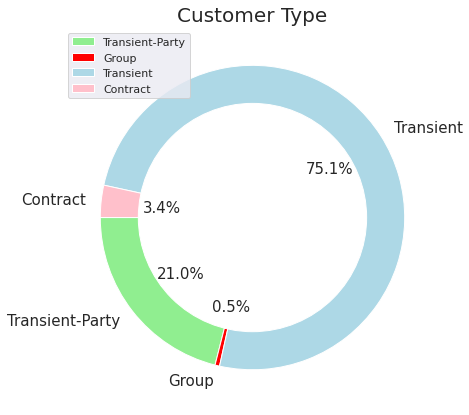

In [168]:
# Plotting customer type using plotly----Pie chart
ee=df.loc[:,['customer_type']].groupby(['customer_type']).size().reset_index()
ee.rename({0:'count'},axis=1,inplace=True)
ff=ee.iloc[[3,1,2,0],[1,0]]

#pie plotting
plt.pie(ff['count']  ,labels=ff['customer_type'],colors=['lightgreen','red','lightblue','pink'],radius=1,startangle=180,textprops={'fontsize': 15},
        autopct='%0.1f%%')
plt.legend(loc='upper left')
plt.title('Customer Type',fontsize = 20)

#donut
cir=plt.Circle(xy=(0,0) , radius=0.75, facecolor='white')
plt.gca().add_artist(cir)
plt.show()

In [169]:
# Function to convert month(string) to numeber(int)

def num_monthx(month_name):
  m=['January','February','March','April','May','June','July','August','September','October','November','December']
  n=[1,2,3,4,5,6,7,8,9,10,11,12]
  return(n[m.index(month_name)])


In [170]:
# average daily rate per person =  ADR/(Adults+Children)

gg=df.loc[:,['hotel','arrival_date_month','adults', 'children','adr']]
gg['arrival_date_month']=gg['arrival_date_month'].apply(month_name)
gg['Total_cx']=gg['children']+gg ['adults']

hh=gg.groupby(['arrival_date_month','hotel']).sum().reset_index()
hh['month_number']=hh['arrival_date_month'].apply(num_monthx)
hh['avg_adr_pp']=hh['adr']/hh['Total_cx']

ii=hh.sort_values(by='month_number')

Text(0.5, 1.0, 'ADR per person')

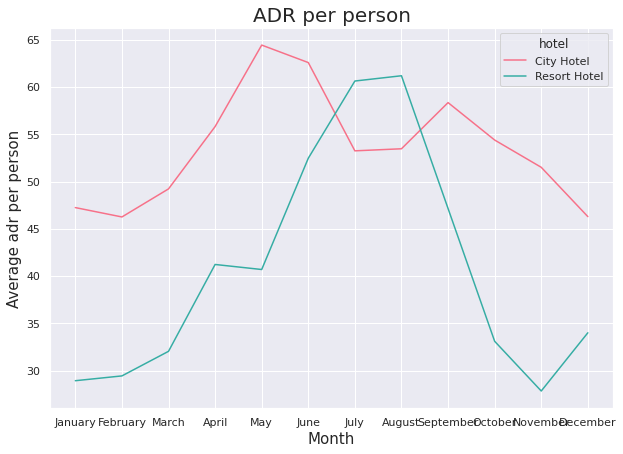

In [171]:
#Plotting adr per person for each month in sea born

sns.lineplot(data = ii, x = 'arrival_date_month', y = 'avg_adr_pp', hue = 'hotel',palette="husl")
plt.rcParams['figure.figsize']=(25,7)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Average adr per person',fontsize=15)
plt.title('ADR per person',fontsize=20)

<Figure size 1440x360 with 0 Axes>

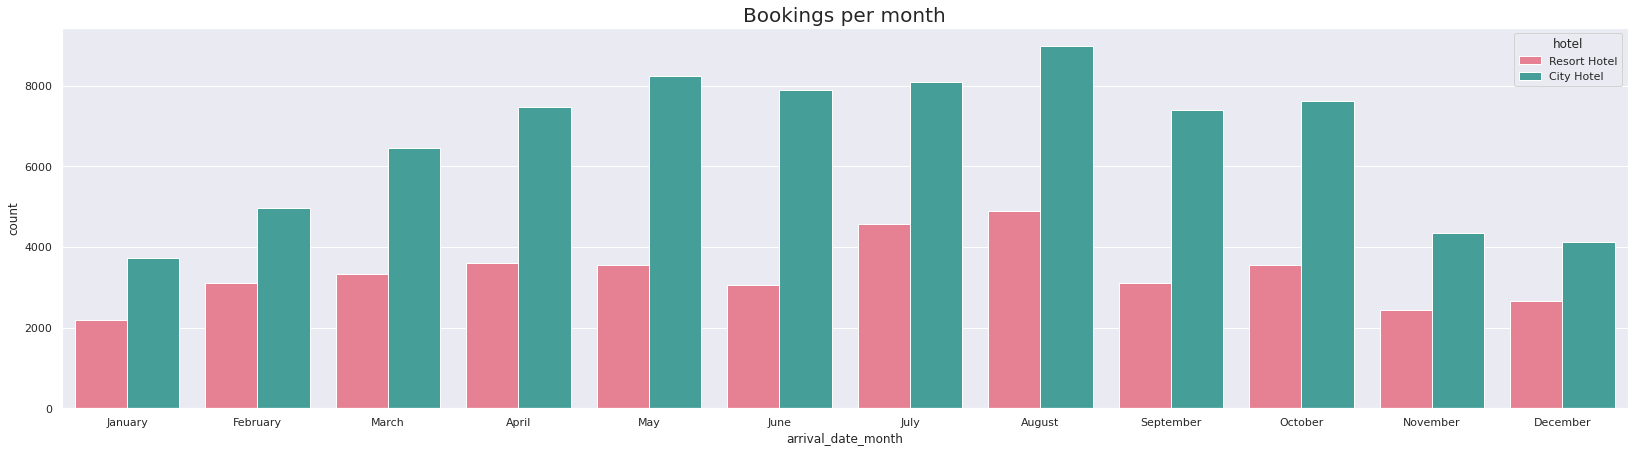

<Figure size 1440x360 with 0 Axes>

In [172]:
# Numer of bookings with respect to each month
sns.countplot(data = gg, x = 'arrival_date_month', hue = 'hotel',palette='husl', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Bookings per month',fontsize=20)
plt.figure(figsize=(20,5))


In [173]:
#Collection of Percentage of Reserved rooms and allocated rooms in the given Dataframe for three different years.
r_RA = pd.DataFrame((df[df['arrival_date_year'] == 2015]).shape, columns = ['count'])
s_RA = pd.DataFrame((df[(df['arrival_date_year'] == 2015) & (df['reserved_room_type'] == df['assigned_room_type'])]).shape, columns = ['count'])
t_RA = pd.DataFrame((df[(df['arrival_date_year'] == 2015) & (df['reserved_room_type'] != df['assigned_room_type'])]).shape, columns = ['count'])
a_RA = (s_RA.iloc[0,0] / r_RA.iloc[0,0]) * 100
a_RA = int(a_RA)
b_RA = (t_RA.iloc[0,0] / r_RA.iloc[0,0]) * 100
b_RA = int(b_RA)

u_RA = pd.DataFrame((df[df['arrival_date_year'] == 2016]).shape, columns = ['count'])
v_RA = pd.DataFrame((df[(df['arrival_date_year'] == 2016) & (df['reserved_room_type'] == df['assigned_room_type'])]).shape, columns = ['count'])
w_RA = pd.DataFrame((df[(df['arrival_date_year'] == 2016) & (df['reserved_room_type'] != df['assigned_room_type'])]).shape, columns = ['count'])
c_RA = (v_RA.iloc[0,0] / u_RA.iloc[0,0]) * 100
c_RA = int(c_RA)
d_RA = (w_RA.iloc[0,0] / u_RA.iloc[0,0]) * 100
d_RA = int(d_RA)

x_RA = pd.DataFrame((df[df['arrival_date_year'] == 2017]).shape, columns = ['count'])
y_RA = pd.DataFrame((df[(df['arrival_date_year'] == 2017) & (df['reserved_room_type'] == df['assigned_room_type'])]).shape, columns = ['count'])
z_RA = pd.DataFrame((df[(df['arrival_date_year'] == 2017) & (df['reserved_room_type'] != df['assigned_room_type'])]).shape, columns = ['count'])
e_RA = (y_RA.iloc[0,0] / x_RA.iloc[0,0]) * 100
f_RA = (z_RA.iloc[0,0] / x_RA.iloc[0,0]) * 100
e_RA = int(e_RA)
f_RA = int(f_RA)

In [174]:
#storing the values in the lists
bar1_list = list([a_RA,c_RA,e_RA])
bar2_list = list([b_RA,d_RA,f_RA])

In [175]:
#Fixing the Bars of the graph
width_of_RandA_rooms = 0.3
list_of_RandA_rooms = ['2015','2016','2017']
bar1 = np.arange(len(list_of_RandA_rooms))
bar2 = [i + width_of_RandA_rooms for i in bar1]

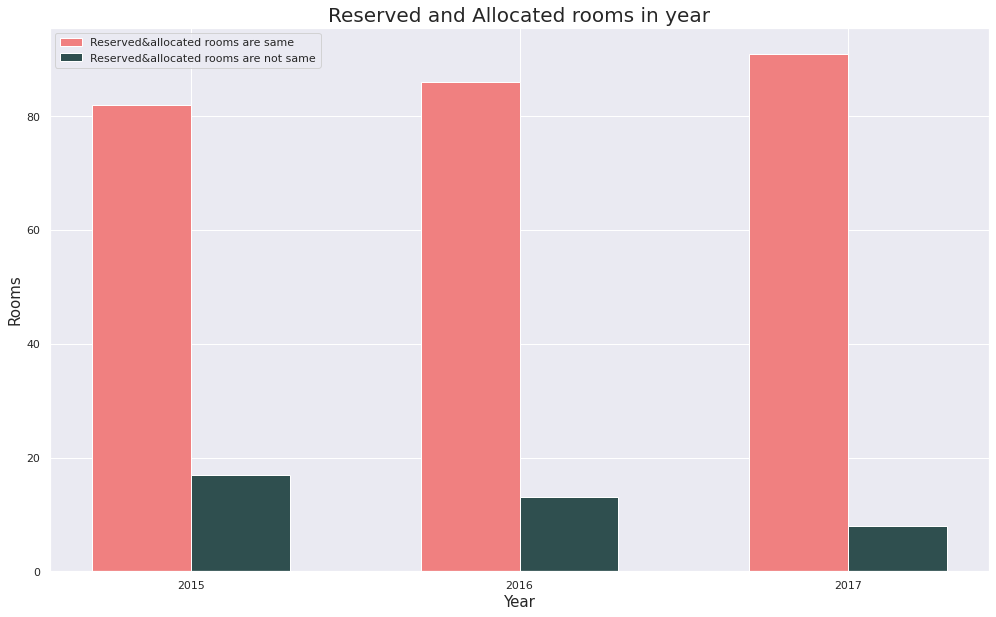

In [176]:
#Plotting the Bar graph
plt.figure(figsize= (15,10))
plt.bar(bar1,bar1_list,width_of_RandA_rooms,color = 'lightcoral', label = 'Reserved&allocated rooms are same')
plt.bar(bar2,bar2_list,width_of_RandA_rooms,color = 'darkslategray', label = 'Reserved&allocated rooms are not same')
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Rooms',fontsize = 15)
plt.title('Reserved and Allocated rooms in year',fontsize = 20)
plt.xticks(bar1+width_of_RandA_rooms/2,list_of_RandA_rooms)
plt.legend()
plt.show()
#Conclusion : Over the years both hotels have shown improvement in allocating rooms(type) as same as Reserved rooms(type). This could increase the reputation of the hotels.

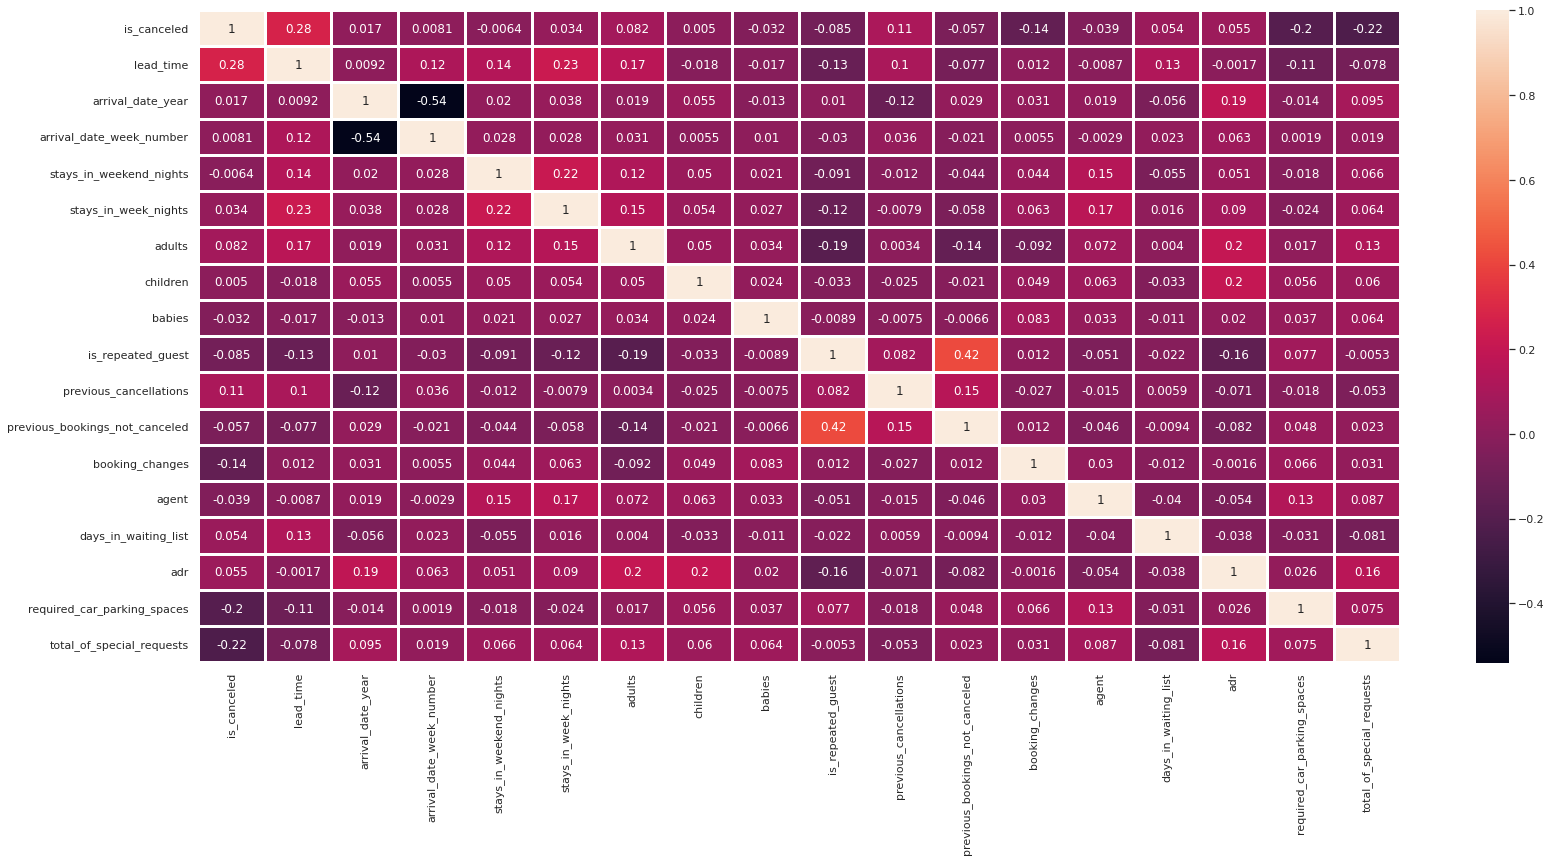

In [177]:
#Heat map to calculate the Correlation 
plt.figure(figsize = (24, 12))

df_co_relation = df.corr()
sns.heatmap(df_co_relation, annot = True, linewidths = 2)
plt.show()

In [178]:
# Total stays in hotel
not_canceled = df['is_canceled'] == 0
temp = df[not_canceled]
temp['total_nights'] = temp['stays_in_weekend_nights'] + temp['stays_in_week_nights']
tem = temp.groupby(['total_nights', 'hotel']).agg('count').reset_index()
tem = tem.iloc[:, :3]
tem = tem.rename(columns={'is_canceled':'Number of stays'})
tem


,total_nights,hotel,Number of stays
0,0.0,City Hotel,308
1,0.0,Resort Hotel,372
2,1.0,City Hotel,9169
3,1.0,Resort Hotel,6580
4,2.0,City Hotel,10992
5,2.0,Resort Hotel,4488
6,3.0,City Hotel,11911
7,3.0,Resort Hotel,3933
8,4.0,City Hotel,7822
9,4.0,Resort Hotel,3834


In [179]:
px.bar(data_frame = tem, x = 'total_nights', y = 'Number of stays', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

In [180]:
not_canceled = df['is_canceled'] == 0
temp = df[not_canceled]
temp.shape

(75166, 32)

In [181]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [182]:
df[df['country'] > 100].value_counts().count

TypeError: ignored

In [183]:
a = pd.DataFrame(df['country'].value_counts())

In [184]:
a.head(20)

,country
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
ITA,3766
IRL,3375
BEL,2342
BRA,2224
NLD,2104


In [187]:
df.groupby('country').agg({'is_canceled':'sum'},ascending = True)

,is_canceled
country,
ABW,0
AGO,205
AIA,0
ALB,2
AND,5
...,...
VNM,2
ZAF,31
ZMB,1


In [188]:
# Out of 119000 booking records almost 90 percent of bookings are from countries 
# Portugal -PRT
# Great Britain - GBR 
# France - FRA
# Spain -ESP
# Germany - DEU
# Italy - ITA
# Ireland - IRE
# Belgium - BEL
# Brazil - BRA
# Nether land - NLD

In [213]:
df_temp = df['country'] == 'PRT'
df_country = df[df_temp]
print(df_country.shape)
cancelled = pd.DataFrame(df_country[df_country == 1].count()).reset_index()
print(cancelled.iloc[1,1])
print(cancelled)

(48590, 32)
27519
                             index      0
0                            hotel      0
1                      is_canceled  27519
2                        lead_time   1857
3                arrival_date_year      0
4               arrival_date_month      0
5         arrival_date_week_number    350
6        arrival_date_day_of_month      0
7          stays_in_weekend_nights  11615
8             stays_in_week_nights  15057
9                           adults  12442
10                        children   1464
11                          babies    403
12                            meal      0
13                         country      0
14                  market_segment      0
15            distribution_channel      0
16               is_repeated_guest   3250
17          previous_cancellations   5791
18  previous_bookings_not_canceled   1071
19              reserved_room_type      0
20              assigned_room_type      0
21                 booking_changes   4491
22              